### 1.Import Dependecies

In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Loading the Dataset

In [49]:
df=pd.read_csv("../data/processed/ChurnModelling_Missing_values_Handled.csv")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


### 3.Handling Outliers

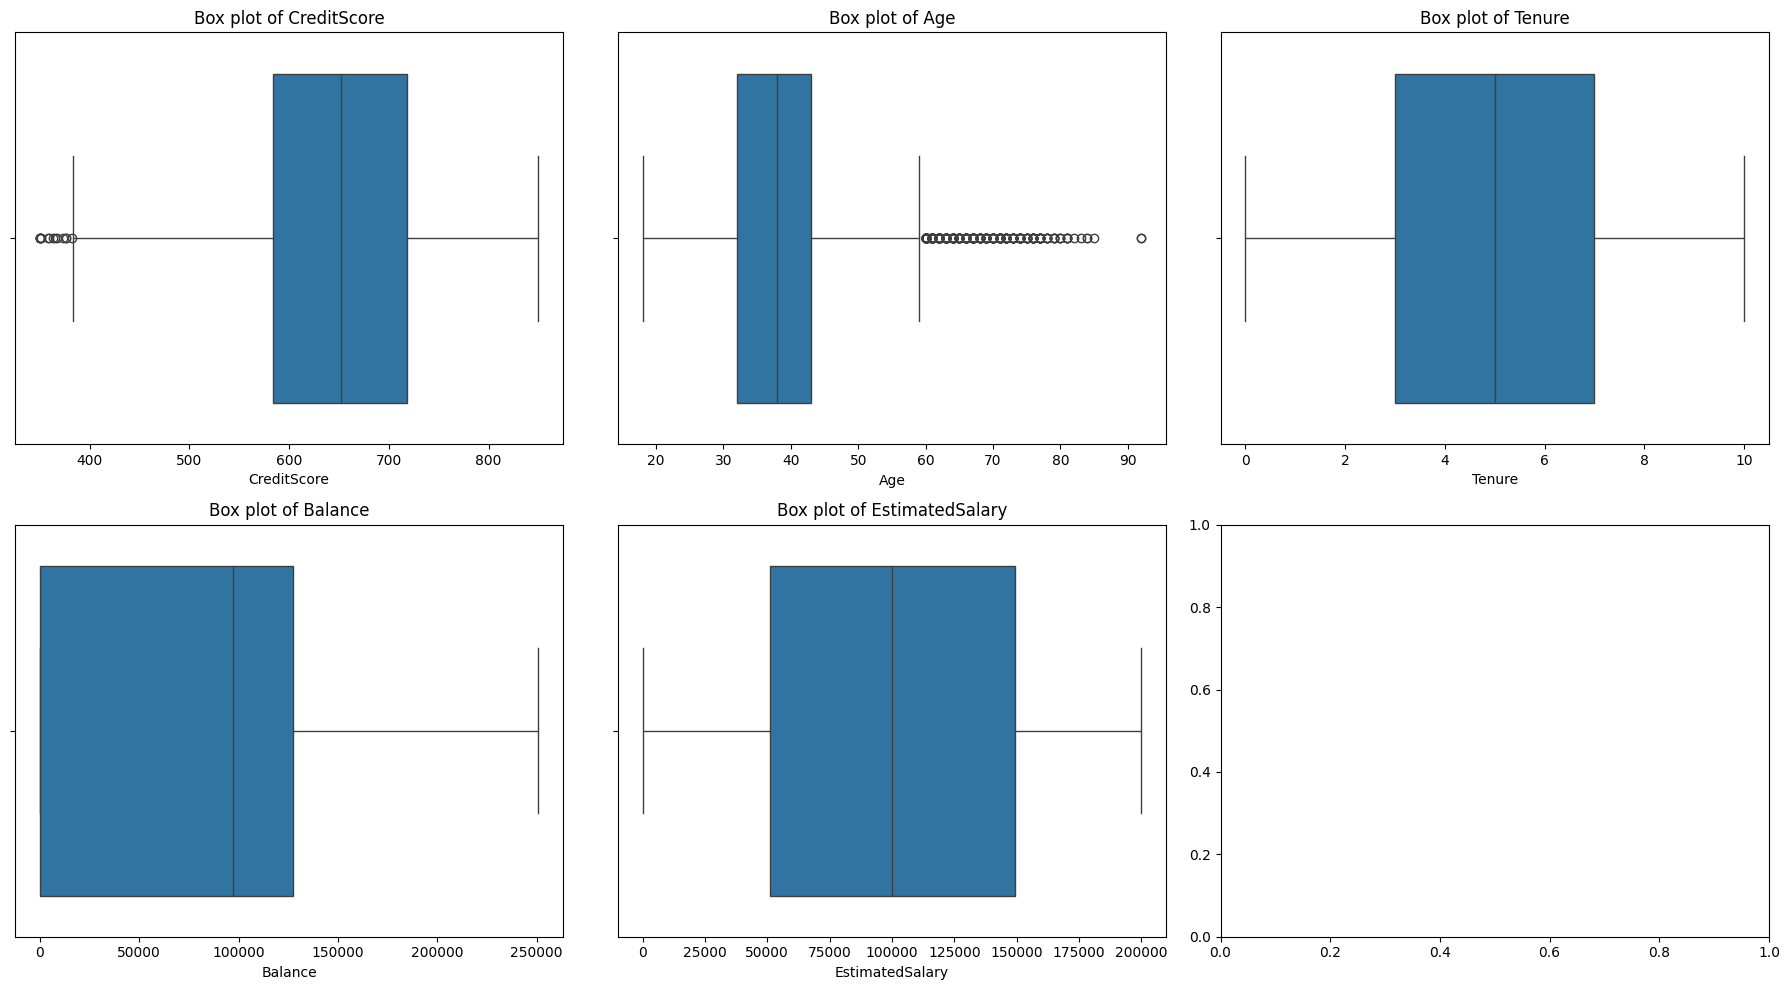

In [50]:
#now We are going to visualize the Outliers using Boxplot using Subplots 
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

## Outlier Handling Strategy
1) Outliers Count in Each Numerical Column
2) Outliers Identify each values in SPecifically
3) viewing the Total Count in Datafram
4) Removing outliers that has 2 occurence in each record

In [51]:
numerical_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [52]:
df_cp=df.copy()
for col in numerical_cols:
    Q1=df_cp[col].quantile(0.25)
    Q3=df_cp[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df_cp[f'{col}_outliers']=((df_cp[col]<lower_bound)|(df_cp[col]>upper_bound))
    print(f'Number of outliers in {col}: {df_cp[f"{col}_outliers"].sum()}')


Number of outliers in CreditScore: 15
Number of outliers in Age: 501
Number of outliers in Tenure: 0
Number of outliers in Balance: 0
Number of outliers in EstimatedSalary: 0


In [53]:
df_cp[["CreditScore_outliers","Age_outliers","Tenure_outliers","Balance_outliers","EstimatedSalary_outliers"]] = df_cp[["CreditScore_outliers","Age_outliers","Tenure_outliers","Balance_outliers","EstimatedSalary_outliers"]].astype(np.int64)
df_cp["Outlier_Count"] = df_cp[["CreditScore_outliers","Age_outliers","Tenure_outliers","Balance_outliers","EstimatedSalary_outliers"]].sum(axis=1)

In [54]:
df_cp=df_cp[df_cp["Outlier_Count"]<2]
df_cp

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_outliers,Age_outliers,Tenure_outliers,Balance_outliers,EstimatedSalary_outliers,Outlier_Count
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.00,5,0.00,2,1,0,96270.64,0,0,0,0,0,0,0
9996,516,France,Male,35.00,10,57369.61,1,1,1,101699.77,0,0,0,0,0,0,0
9997,709,France,Female,36.00,7,0.00,1,0,1,42085.58,1,0,0,0,0,0,0
9998,772,Germany,Male,42.00,3,75075.31,2,1,0,92888.52,1,0,0,0,0,0,0
